In [15]:
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
%matplotlib inline
# Model
# pip install -U ultralytics
model = torch.hub.load('ultralytics/yolov5', 'yolov5x', pretrained=True)


Using cache found in C:\Users\tinke/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-6-6 Python-3.11.3 torch-2.1.0.dev20230604+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
Adding AutoShape... 


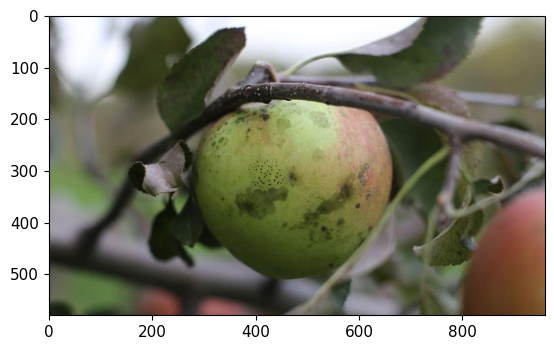

In [16]:
# Image
im = '25.jpg' #yolo5s does not but yolov5m does identify
# Load and plot the image
image = plt.imread(im)
plt.imshow(image)

In [17]:
# Inference
results = model(im)

results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,795.251465,327.973969,960.000000,574.581726,0.874818,47,apple
1,274.673828,154.077042,669.377197,513.627625,0.854127,47,apple
2,165.368805,523.013428,261.434448,579.438232,0.362006,47,apple


In [18]:
results.xyxy[0][0]


tensor([7.95251e+02, 3.27974e+02, 9.60000e+02, 5.74582e+02, 8.74818e-01, 4.70000e+01], device='cuda:0')

In [19]:
boxes = results.xyxy[0].cpu().numpy()[:, :4] 
boxes[0]
x1,y1,x2,y2 = boxes[1]
print(x1,y1,x2,y2)

274.67383 154.07704 669.3772 513.6276


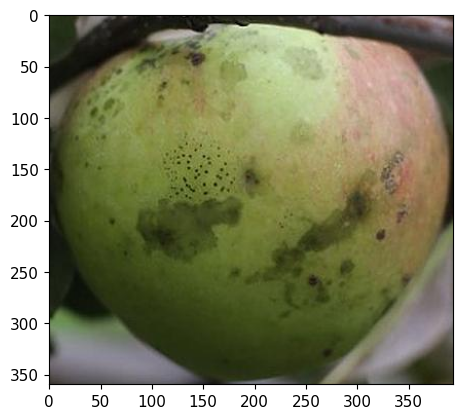

In [20]:
import torchvision.transforms as T
image = Image.open('25.jpg').convert('RGB')
# functional.crop(top: int, left: int, height: int, width: int)
cropped_image = T.functional.crop(image, y1,x1,(y2-y1),(x2-x1))
plt.imshow(cropped_image)

In [21]:
# # Results
# #crops = results.crop(save=True) 
# crops = results.crop(save=True, save_dir='apple_cropped/')  # specify save dir

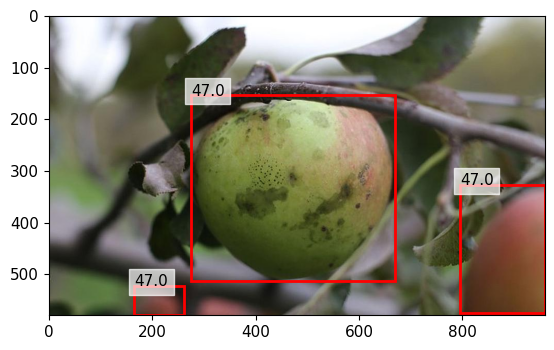

<Figure size 640x480 with 0 Axes>

In [25]:
# Retrieve bounding box coordinates and labels
boxes = results.xyxy[0].cpu().numpy()[:, :4]  # Move tensor to CPU and convert to numpy
labels = results.xyxy[0].cpu().numpy()[:, -1]  # Move tensor to CPU and convert to numpy

# Load and plot the image
image = plt.imread(im)
plt.imshow(image)

# Plot the bounding boxes
for box, label in zip(boxes, labels):
    xmin, ymin, xmax, ymax = box
    width = xmax - xmin
    height = ymax - ymin
    rect = Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
    plt.text(xmin, ymin, label, bbox=dict(facecolor='white', edgecolor='white', alpha=0.7))

# Show the image with bounding boxes
plt.show()

In [23]:
# resize 224x224 for optimal performance
import os
from PIL import Image, ImageOps
import numpy as np
import torchvision.transforms as T
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5x', pretrained=True)

resizeshape = 224


for subdir, dirs, files in os.walk('./apple_disease_classification/Train'):
    for file in files:
        filepath = subdir + os.sep + file
        last_folder_name = os.path.basename(os.path.normpath(subdir))

        # to-do pre-check for all image filetypes
        if filepath.endswith(".jpg") or filepath.endswith(".jpeg"):
            img = Image.open(filepath).convert('RGB')
            if img.size != (resizeshape,resizeshape):
                result = model(img)

                boxes = result.xyxy[0].cpu().numpy()[:, :4] 
                if len(boxes)>=1:  # on blotch 7 it will detect nothing, so no index =  error, on blotch 25-26it will detect the apple blurred in the front (still an apple but not blotched) i deleted these
                    x1,y1,x2,y2 = boxes[0]
                    cropped_image = T.functional.crop(img, y1,x1,(y2-y1),(x2-x1))
                    
                    # Create the output directory if it doesn't exist
                    output_dir = './apple_cropped/' + last_folder_name
                    os.makedirs(output_dir, exist_ok=True)

                    # Save the crop
                    cropped_image.save(os.path.join(output_dir, file))



Using cache found in C:\Users\tinke/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-6-6 Python-3.11.3 torch-2.1.0.dev20230604+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
Adding AutoShape... 


In [24]:
print(filepath)

NameError: name 'filepath' is not defined